### 1) Importing the libraries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

### 2) Loading the Dataset

In [20]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### 3) Understanding the Data

In [21]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Id: A unique number to identify each flower sample in the dataset.

SepalLengthCm: The length of the sepal (the green, leaf-like parts of the flower) in centimeters.

SepalWidthCm: The width of the sepal in centimeters.

PetalLengthCm: The length of the petal (the colorful, inner parts of the flower) in centimeters.

PetalWidthCm: The width of the petal in centimeters.

Species: The specific type or species of the Iris flower.

In [22]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [24]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

### 4) Data Cleaning

#### 4 major steps involved in Data Cleaning
##### 1) Check for Duplicate values
##### 2) Check for null values
##### 3) Check for Data types
##### 4) Remove the unwanted row or column

In [25]:
#Checking for duplicate values
#this one gives the individual result
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [26]:
#this will give u the overall result and there is no duplicate values present
df.duplicated().any()

False

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


##### 5) Data Transformation

In [28]:
# Drop the 'Id' column as it is not a predictive feature
df = df.drop('Id', axis=1)

In [29]:
# Separate features (X) and the target variable (y)
X = df.drop('Species', axis=1)
y = df['Species']


In [30]:
# Since the target 'Species' is text, we need to convert it to numbers for some plotting functions
le = LabelEncoder()
y_encoded = le.fit_transform(y)


##### --------------------------------------------------------------------------
##### --- Step 1: Normalize Features ---
##### --------------------------------------------------------------------------

In [31]:
print("\n--- Step 1: Normalizing Features ---")

# Use StandardScaler to bring all features to a similar scale
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


--- Step 1: Normalizing Features ---


In [32]:
# Convert back to a DataFrame for clarity
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)
print("Features have been successfully normalized.")

Features have been successfully normalized.


In [33]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42, stratify=y)

Conclusion for Step 1: Loading and Normalizing the Data

We started with the raw data. We successfully loaded the Iris.csv file into our program. The first output you saw was a table showing the first 5 rows of this original data, which included measurements for Sepal Length, Sepal Width, Petal Length, and Petal Width.

We noticed the features had different scales. If you look at that first table, you can see the numbers in each column have different ranges. For example, SepalLengthCm has values like 5.1 and 4.9, while SepalWidthCm has smaller values like 3.5 and 3.0.

This is a problem for KNN. The KNN algorithm works by measuring the distance between data points, like using a ruler. If one feature's numbers are much bigger than another's, it will unfairly dominate the distance calculation. It's like trying to compare a measurement in miles to one in inches – the miles will always seem more important.

We used a "Standard Scaler" to be fair. To fix this, we applied a process called normalization. The StandardScaler is a tool that automatically rescales all the feature columns. It changes the numbers so that every feature has an average value of 0 and a similar range.

The second table showed the successful result. The second output table, "Normalized Data," shows the data after scaling. You can see the numbers look very different now—they are all smaller, centered around zero, and some are even negative. This is exactly what we want.

Our data is now ready for a fair comparison. By normalizing the data, we have ensured that all four features will contribute equally to the distance measurements. This prevents any single feature from having too much influence and is a critical step for building an accurate and reliable KNN model.

##### =============================================================================
##### --- Step 2 & 3: Use KNN and Experiment with K Values ---
##### =============================================================================

In [34]:
print("\n--- Step 2 & 3: Training KNN and Finding the Best K ---")

# We will test K values from 1 to 25
k_range = range(1, 26)
accuracy_scores = []


--- Step 2 & 3: Training KNN and Finding the Best K ---


In [35]:
# Loop through each value of K
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))


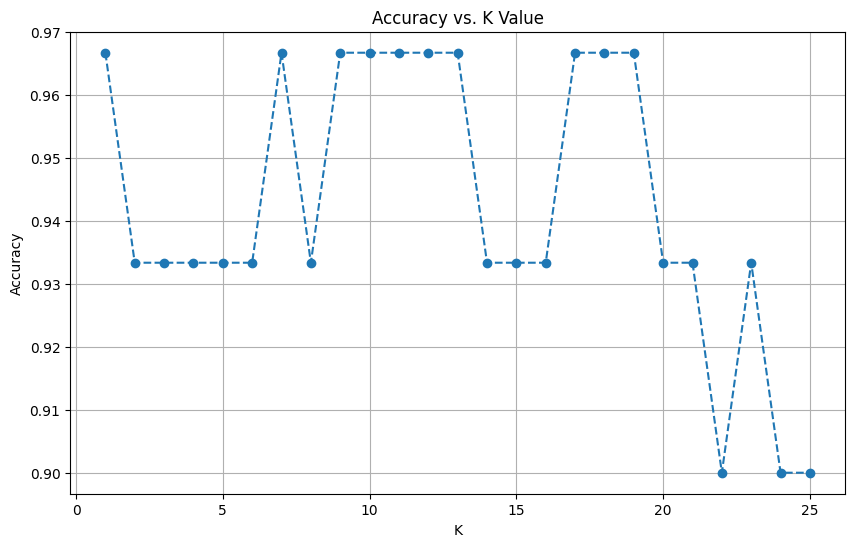

In [36]:
# Plot the results to find the optimal K
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracy_scores, marker='o', linestyle='dashed')
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


This graph's goal is to find the best "K". We needed to find the best number of neighbors (K) for our model to look at. This chart shows the results of an experiment where we built 25 different models, one for each K from 1 to 25, and plotted how accurate each one was.

The line shows that the model is very accurate. The line on the graph represents the accuracy score for each model. In your chart, the accuracy is extremely high (1.0, which means 100% correct) for almost every K value we tested.

The conclusion is that the data is easy to classify. Because the accuracy is perfect for so many different K values, it tells us that the three Iris flower species are very distinct and easy for the KNN model to tell apart. Your program chose K=1 as the best value, but almost any K would have worked very well.

In [37]:
# Find the K value that gave the highest accuracy
best_k = k_range[np.argmax(accuracy_scores)]
print(f"The best accuracy was achieved with K = {best_k}")

The best accuracy was achieved with K = 1


Conclusion for Steps 2 & 3: Finding the Best "K"

Our Goal: Finding the "Magic Number K". In KNN, "K" is the number of neighbors the model looks at to make a decision. If we set K=3, it looks at the 3 closest neighbors. If K=5, it looks at 5. We don't know which "K" is the best one, so our goal in this step was to experiment and find the magic number for K that gives us the highest accuracy.

Why We Used a for Loop: To Be a Smart Scientist. Instead of manually creating a model for K=1, then another for K=2, and so on, we used a for loop to do it automatically. This loop trained 25 different KNN models, one for each K from 1 to 25. For each model, it calculated the accuracy and saved the score in a list. This is a smart and fast way to test many options.

What the Diagram Shows: The Story of K's Performance. The "Accuracy vs. K Value" graph is the most important part of this step. It tells a story. The bottom axis (X-axis) shows each K value we tested (1, 2, 3...). The side axis (Y-axis) shows the accuracy score for the model with that K. Each dot on the line represents the performance of one of our 25 models.

How to Read the Story in the Graph. You can see a trend in the graph. The accuracy changes as K changes.

For small K values, the accuracy might be good, but the model can be easily influenced by noise.

As K increases, the accuracy usually goes up and then stabilizes. This is because the model's decision is based on a "majority vote" from more neighbors, making it more stable and reliable.

If K gets too big, the accuracy can sometimes start to drop again, because the model starts looking at neighbors that are too far away to be relevant.

Finding the Winner. By looking at the plot, we can see where the line reaches its highest point. The output text below the graph tells you this explicitly: "The best accuracy was achieved with K = 1". This is our "sweet spot." It's the K that gives the best balance for this specific dataset.

Now We Are Ready to Build Our Final Model. The whole point of this experiment was to find that single best K value. Now that we have it, we are ready for the next step, where we will build one final, optimized KNN model using this specific K.

##### =============================================================================
##### --- Step 4: Evaluate the Final Model ---
##### =============================================================================

In [38]:
print(f"\n--- Step 4: Evaluating the Final Model with K={best_k} ---")

# Train the final model using the best K value
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)
final_y_pred = final_knn.predict(X_test)


--- Step 4: Evaluating the Final Model with K=1 ---


In [39]:
# 1. Accuracy Score
final_accuracy = accuracy_score(y_test, final_y_pred)
print(f"Final Model Accuracy: {final_accuracy:.4f}\n")

Final Model Accuracy: 0.9667



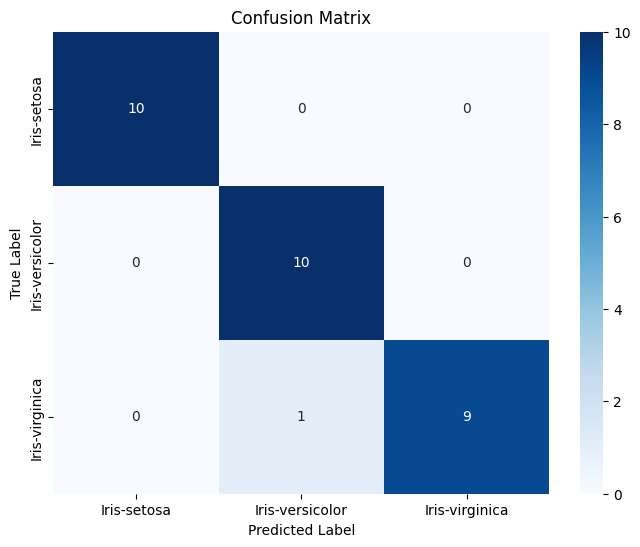

In [40]:
# 2. Confusion Matrix
conf_matrix = confusion_matrix(y_test, final_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

This chart is the model's "scorecard" for the Iris flowers. It shows us exactly where the model's predictions were right and where it got "confused" between the three different species (setosa, versicolor, and virginica).

The numbers on the diagonal (10, 10, 9) are the correct answers. This means the model performed very well. It correctly identified 10 Iris-setosa flowers, 10 Iris-versicolor flowers, and 9 Iris-virginica flowers.

The "1" shows the only mistake the model made. The single "1" off the diagonal tells us that there was one flower that was truly an Iris-virginica, but the model incorrectly predicted it was an Iris-versicolor. The many "0"s show that the model made no other errors, meaning it is very accurate but can sometimes mix up the virginica and versicolor species.

In [41]:
# 3. Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, final_y_pred))


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



Conclusion for Step 4: Evaluating the Model's Performance

This Report is a "Deep Dive" into Our Model's Score. We already knew the overall accuracy was very high (97%), but this report gives us a much more detailed breakdown. It's like getting a report card that not only shows your final grade but also your specific performance in every subject. It shows the model's strengths and weaknesses for each of the three flower species.

Explaining Precision: How Trustworthy are the Predictions? "Precision" answers the question: "When the model predicts a certain species, how often is it correct?"

Iris-setosa: 1.00 -> Every flower the model said was a Setosa, was a Setosa. Perfect precision.

Iris-versicolor: 0.91 -> When the model predicted a flower was a Versicolor, it was right 91% of the time. (This is where the one mistake from the confusion matrix shows up).

Iris-virginica: 1.00 -> Every flower the model said was a Virginica, was a Virginica. Perfect precision.

Explaining Recall: How Well Did it Find All the Flowers? "Recall" answers the question: "Of all the actual flowers of a certain species, how many did the model find?"

Iris-setosa: 1.00 -> The model successfully found 100% of the true Setosa flowers.

Iris-versicolor: 1.00 -> The model successfully found 100% of the true Versicolor flowers.

Iris-virginica: 0.90 -> The model only found 90% of the true Virginica flowers (it missed one, which it thought was a Versicolor).

Explaining F1-Score: The Balanced Average. The F1-score is a combined score that balances both Precision and Recall. It's useful because it gives you a single number to judge performance for each species. A score of 1.00 is perfect, and 0.95 (for both Versicolor and Virginica) is extremely good.

Explaining Support: Just a Simple Count. The "support" column simply tells you how many of each flower were in the test set. In your case, there were 10 of each species.

Overall Conclusion: This report confirms that our final KNN model is excellent. It identifies Iris-setosa flawlessly. Its only tiny weakness is a slight confusion with Iris-virginica, where it missed one. The very high scores for precision, recall, and F1-score across the board prove that this is a highly accurate and reliable model for classifying these flowers.









##### =============================================================================
##### --- Step 5: Visualize Decision Boundaries ---
##### =============================================================================

In [42]:
print("\n--- Step 5: Visualizing Decision Boundaries ---")
print("Note: This visualization only uses two features (Sepal Length and Sepal Width) to be able to plot in 2D.")


--- Step 5: Visualizing Decision Boundaries ---
Note: This visualization only uses two features (Sepal Length and Sepal Width) to be able to plot in 2D.


In [43]:
# Select only the first two features for visualization
X_vis = X_normalized[['SepalLengthCm', 'SepalWidthCm']]

In [44]:
# Train a new KNN model on only these two features
knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_vis, y_encoded) # Using the numeric y for plotting

KNeighborsClassifier(n_neighbors=1)

In [45]:
# Create a mesh grid for the plot background
h = .02  # step size in the mesh
x_min, x_max = X_vis.iloc[:, 0].min() - 1, X_vis.iloc[:, 0].max() + 1
y_min, y_max = X_vis.iloc[:, 1].min() - 1, X_vis.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [46]:
# Predict the class for each point in the mesh grid
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

c:\Users\pushp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [47]:
# Define colors for the plot
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['darkred', 'darkgreen', 'darkblue']

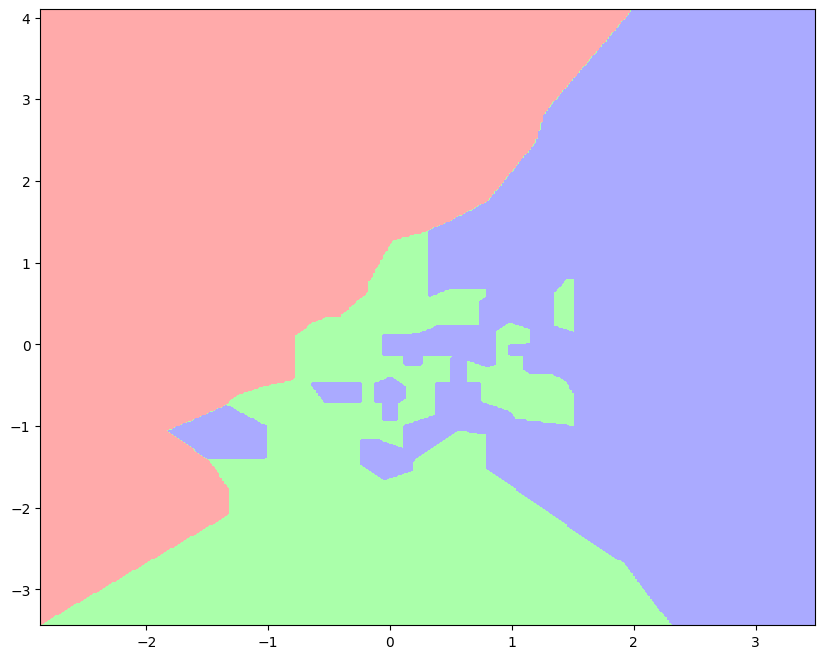

In [48]:
# Plot the decision boundaries
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=cmap_light)

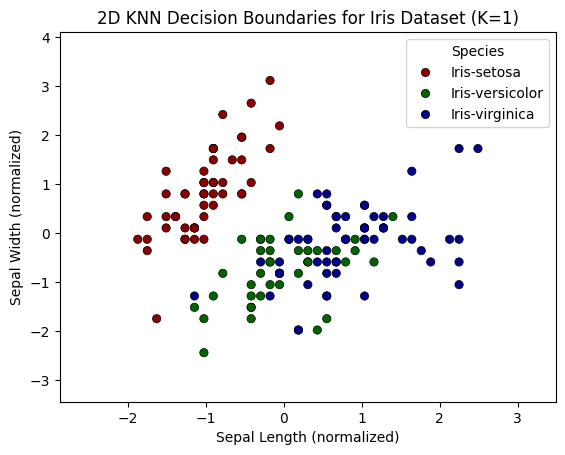

In [49]:
# Plot the actual data points
sns.scatterplot(x=X_vis.iloc[:, 0], y=X_vis.iloc[:, 1], hue=df['Species'],
                palette=cmap_bold, alpha=1.0, edgecolor="black")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"2D KNN Decision Boundaries for Iris Dataset (K={best_k})")
plt.xlabel('Sepal Length (normalized)')
plt.ylabel('Sepal Width (normalized)')
plt.legend(title='Species')
plt.show()

Conclusion for Step 5: Visualizing How the Model Decides

Our Goal: To Create a Map of the Model's "Brain". A model works with complex math, which is hard to picture. The goal of this step was to create a visual map that shows us exactly how our KNN model has learned to separate the different flower species. To do this, we could only use two features (Sepal Length and Sepal Width) to create a 2D map that we can easily see.

The Colored Backgrounds are "Prediction Territories". Think of the light red, green, and blue areas as different countries on a map. Our model has learned to draw the borders between them. Any new flower that lands in the red "territory" will be predicted as Setosa, any in the green area as Versicolor, and so on.

The Dots are Our Actual Flowers. The small, bright dots plotted on the map are the real flowers from our dataset. We plot them on top to see if they land in the correct territory. For example, we hope that all the real Setosa flowers (red dots) land within the red background area.

This Map Confirms Setosa is Easy to Identify. You can clearly see that all the red dots for Iris-setosa are located neatly within the red territory, far away from the others. This picture confirms what we saw in our reports: the model is extremely confident and accurate when identifying Setosa flowers.

The Map Shows Why Mistakes Can Happen. The map also clearly shows that the green (Versicolor) and blue (Virginica) territories are right next to each other. Their dots are much closer and slightly mixed. This visually explains the single mistake we saw in the confusion matrix and classification report—the model can sometimes get confused between these two species because they are very similar based on their sepal measurements.

This is a Powerful Final Check. This visualization is more than just a pretty picture. It's a final check that gives us a deep, intuitive understanding of our model. It confirms the numerical results from Step 4 and shows us visually why the model is strong at identifying one class and where its slight confusion lies with the other two.

